In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("covid.csv")

df.rename(columns = {'Tot Cases//1M pop':'Cases Per Million', 'Tot Deaths/1M pop':'Deaths Per Million'}, inplace = True)

# Part 1:
# o Display the dataset rows using appropriate pandas methods
# o Display the general statistics of each column in the dataset
# o Filter out the missing values if any and show how you handled it (removing null
# rows, filling in with mean, etc.)
# o Display the country with most deaths
# o Display the country with most cases

#  Part 2 – EDA (Exploratory Data Analysis):
# o Perform Univariate Analysis on any 2 columns
# o Perform Bivariate Analysis on 2 columns of your choice
# o Visualise the top 10 countries with most deaths
# o Visualise the top 10 countries with most cases
# o Visualise the relation between total cases and total deaths and for the country with
# the most cases/deaths
# o Perform an analysis to find the top 5 countries who you think have performed the
# best in the fight against COVID -19

#  Part 3:
# o Note apporpriate observations from analysis done in Part 1
# o Note appropriate observations from analysis done in Part 2

In [5]:
df.isnull().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Cases Per Million          0
Deaths Per Million         0
Death percentage           0
dtype: int64

In [137]:
notes = []
def AddNote(note):
    if(note not in notes):
        notes.append(note)


In [155]:
#Display the dataset rows using appropriate pandas methods
AddNote("Part 1")
df

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Cases Per Million,Deaths Per Million,Death percentage,score
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,592
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,651
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,579
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,563
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,435
...,...,...,...,...,...,...,...,...,...,...,...
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850,368
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000,245
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787,421
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120,534


In [139]:
# Display the general statistics of each column in the dataset
df.describe()

,Population,Total Cases,Total Deaths,Cases Per Million,Deaths Per Million,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


In [140]:
# Filter out the missing values if any and show how you handled it (removing null rows, filling in with mean, etc.)
df.dropna()
print("No null values were present were original database.")
AddNote("The dataset does not contain any null values.")

No null values were present were original database.


In [141]:
# Display the country with most deaths
sorted = df.sort_values(['Total Deaths'], ascending=False)
print("The country with the most deahts is:",sorted.iloc[0,0])

The country with the most deahts is: USA


In [142]:
# Display the country with most cases
sorted = df.sort_values(['Total Cases'], ascending=False)
print("The country with the most cases is:",sorted.iloc[0,0])

The country with the most cases is: USA


In [143]:
AddNote("The Country with the most deaths and cases is USA")

In [144]:
def UnivariateAnalysis(column,excluded=["frequency-table","chart"],df=df):
    stats = {}
    if ("max" not in excluded): stats["max"]=df[column].max()
    if ("min" not in excluded): stats["min"]=df[column].min()
    if ("mean" not in excluded): stats["mean"]=df[column].mean()
    if("median" not in excluded): stats["median"]=df[column].median()
    if("frequency-table" not in excluded): stats["frequency-table"]=df[column].value_counts()
    if("sum" not in excluded): stats["sum"]=df[column].sum()
    return stats

In [145]:
def Analyse(dictionary,dataframe=df):
    returnDict = {}
    for i in dictionary:
        returnDict[i]=[]
        if ("count" in dictionary[i]):
            returnDict[i].append(dataframe.count().sort_values([i],ascending=False)[i])
        if ("sum" in dictionary[i]):
            # print(dataframe.sum().sort_values([i],ascending=False)["Total Deaths"])
            returnDict[i].append(dataframe.sum().sort_values([i],ascending=False)[i])
        if ("mean" in dictionary[i]):
            returnDict[i].append(dataframe.mean().sort_values([i],ascending=False)[i])
        if ("median" in dictionary[i]):
            returnDict[i].append(dataframe.median().sort_values([i],ascending=False)[i])
    return returnDict

In [146]:
# print("The continent with the most countries is",analysed["Country"].index[0],"with",analysed["Country"].max(),"countries")
# print("The continent with the most deaths is",analysed["Total Deaths"].index[0],"with",analysed["Total Deaths"].max(),"deaths")
# print("The continent with the most cases is",analysed["Total Cases"].index[0],"with",analysed["Total Cases"].max(),"cases")
# print("The continent with the most population is",analysed["Population"].index[0],"with",analysed["Population"].max(),"people")
# print()
# print("The continent with the least countries is",analysed["Country"].index[-1],"with",analysed["Country"].min(),"countries")
# print("The continent with the least deaths is",analysed["Total Deaths"].index[-1],"with",analysed["Total Deaths"].min(),"deaths")
# print("The continent with the least cases is",analysed["Total Cases"].index[-1],"with",analysed["Total Cases"].min(),"cases")
# print("The continent with the least population is",analysed["Population"].index[-1],"with",analysed["Population"].min(),"people")

In [147]:
# Perform Univariate Analysis on any 2 columns
death_analysis=UnivariateAnalysis("Total Deaths")
population_analysis=UnivariateAnalysis("Population")

print("The maximum number of deaths in a country were:",death_analysis["max"])
print("The minimum number of deaths in a country were:",death_analysis["min"])
print("The average number of deaths were:",death_analysis["mean"])
print("The median number of deaths were:",death_analysis["median"])
print("The total deaths were:",death_analysis["sum"])
print()
print("The maximum population in a country was:",population_analysis["max"])
print("The minimum population in a country was:",population_analysis["min"])
print("The average population was:",population_analysis["mean"])
print("The median population was:",population_analysis["median"])
print("The total population is:",population_analysis["sum"])
AddNote("\nPart 2")
AddNote(f"The total population count of the dataset is {death_analysis['sum']}")
AddNote(f"The total death count of the world is: {death_analysis['sum']}")

The maximum number of deaths in a country were: 1008222
The minimum number of deaths in a country were: 0
The average number of deaths were: 27448.12888888889
The median number of deaths were: 1965.0
The total deaths were: 6175829

The maximum population in a country was: 1439323776
The minimum population in a country was: 805
The average population was: 35073207.435555555
The median population was: 5827911.0
The total population is: 7891471673


In [148]:
# Perform Bivariate Analysis on 2 columns of your choice

continents=df.groupby('Continent') 

_dict = {
    "Total Deaths":["sum","mean","median"]
}

analysed = Analyse(_dict,continents)
print("The total deaths in each continent were:", dict(analysed["Total Deaths"][0]))
print("The mean deaths in each continent were:", dict(analysed["Total Deaths"][1]))
print("The median deaths in each continent were:", dict(analysed["Total Deaths"][2]))
AddNote(f"The continent with the most deaths is: {analysed['Total Deaths'][0].index[0]} with {analysed['Total Deaths'][0][0]} deaths")


The total deaths in each continent were: {'Europe': 1775727, 'Latin America and the Caribbean': 1686828, 'Asia': 1405003, 'Northern America': 1046062, 'Africa': 252873, 'Oceania': 9336}
The mean deaths in each continent were: {'Northern America': 209212.4, 'Europe': 36994.3125, 'Latin America and the Caribbean': 35142.25, 'Asia': 28673.530612244896, 'Africa': 4359.879310344828, 'Oceania': 549.1764705882352}
The median deaths in each continent were: {'Europe': 10337.0, 'Asia': 8172.0, 'Latin America and the Caribbean': 838.0, 'Africa': 798.0, 'Northern America': 128.0, 'Oceania': 9.0}


In [149]:
# Visualise the top 10 countries with most deaths

# countries = Analyse({"Total Deaths":["sum"]},df.groupby("Country"))
# countries = countries["Total Deaths"][0][0:10]

# fig = plt.figure(figsize=(8,5))
# fig.patch.set_facecolor('white')
# plt.pie(countries.values,labels=countries.index,autopct='%.2f%%',wedgeprops={'edgecolor':'black'})
# plt.show()

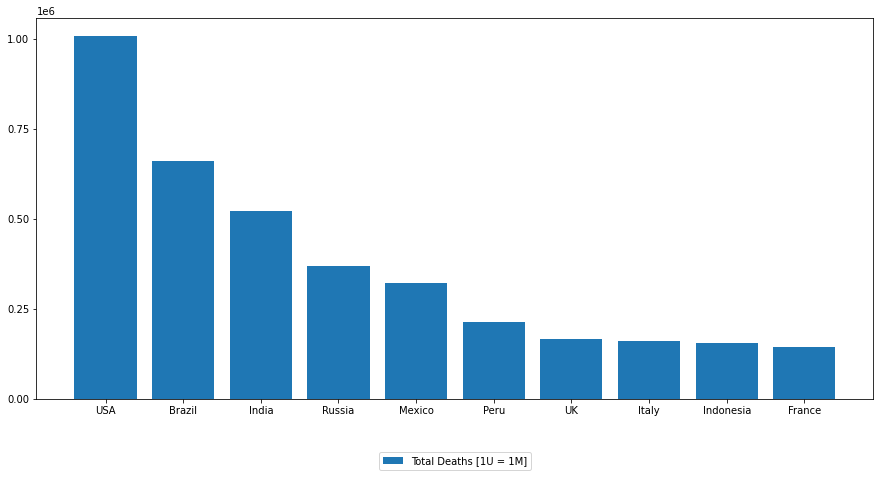

In [150]:
# Visualise the top 10 countries with most deaths
countries = Analyse({"Total Deaths":["sum"]},df.groupby("Country"))
countries = countries["Total Deaths"][0][0:10]

plt.figure(figsize=(15,7))
plt.bar(countries.index,countries.values,label='Total Deaths [1U = 1M]')
plt.yticks([0,250000,500000,750000,1000000])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol= 2)
plt.show()
AddNote(f"The countries with the most deaths are as follows: {str(dict(countries))}")

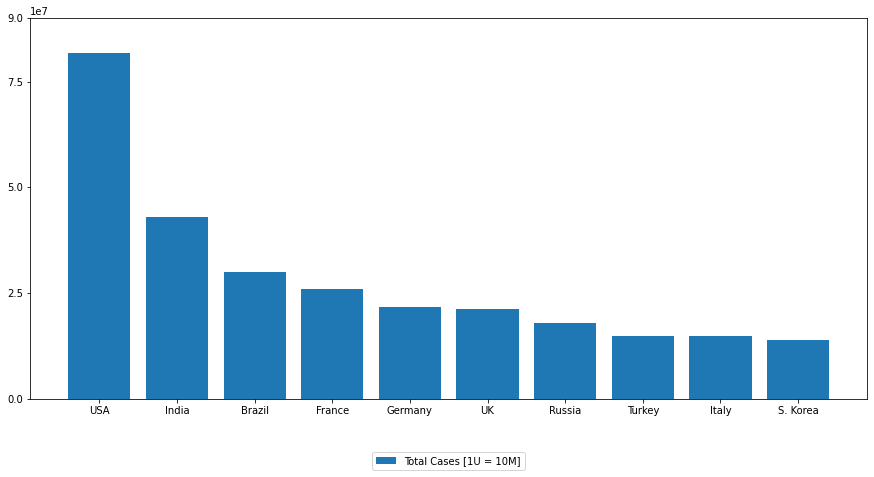

In [151]:
#Visualise the top 10 countries with most cases
countries = Analyse({"Total Cases":["sum"]},df.groupby("Country"))
countries = countries["Total Cases"][0][0:10]

plt.figure(figsize=(15,7))
plt.bar(countries.index,countries.values,label='Total Cases [1U = 10M]')
plt.yticks([0,25000000,50000000,75000000,90000000])
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol= 2)
plt.show()
countries[0]
AddNote(f"The countries with the most cases are as follows: {str(dict(countries))}")

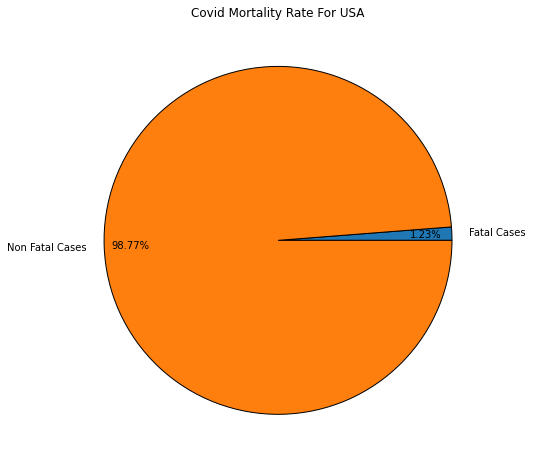

In [152]:
# Visualise the relation between total cases and total deaths and for the country with the most cases/deaths
cases = Analyse({"Total Cases":["sum"]},df.groupby("Country"))["Total Cases"][0]
deaths = Analyse({"Total Deaths":["sum"]},df.groupby("Country"))["Total Deaths"][0]

fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')
plt.title(f"Covid Mortality Rate For {countries.index[0]}")
plt.pie([deaths[0],cases[0]-deaths[0]],labels=["Fatal Cases","Non Fatal Cases"],autopct='%.2f%%',wedgeprops={'edgecolor':'black'},pctdistance=0.85)
plt.show()
AddNote(f"The Mortality rate of USA is: {(deaths[0]/cases[0])*100}")

In [153]:
# o Perform an analysis to find the top 5 countries who you think have performed the best in the fight against COVID -19
# sorting countries by total cases, total deaths, total cases per m, total deaths per m, death pecentage. get there listing in each column in a array then the one with the highest mean wins

analysed = Analyse({"Total Cases":["sum"],"Total Deaths":["sum"],"Death percentage":["sum"],"Cases Per Million":["sum"],"Deaths Per Million":["sum"]},df.groupby("Country"))
# deaths = Analyse({"Total Deaths":["sum"]},df.groupby("Country"))["Total Deaths"][0]
cases = analysed["Total Cases"][0]
cases_m = analysed["Cases Per Million"][0]
deaths = analysed["Total Deaths"][0]
deaths_m = analysed["Deaths Per Million"][0]
deaths_p = analysed["Death percentage"][0]
df.loc[::,"score"] = 224*5
for i in range(len(analysed["Total Cases"][0].index)):
    df.loc[df.Country == cases.index[i],"score"] += -i
    df.loc[df.Country == deaths.index[i],"score"] += -i
    df.loc[df.Country==cases_m.index[i],"score"]+= -i
    df.loc[df.Country == deaths_m.index[i],"score"]+= -i
    df.loc[df.Country == deaths_p.index[i],"score"]+= -i

AddNote(f"The best performing country is: {df.sort_values(['score']).iloc[0].Country}")
AddNote(f"The best performing country is: {df.sort_values(['score']).iloc[-1].Country}")

print("According to My Analysis These Countries have performed the best")
print("Note: Lower The score, better the performace")
df.sort_values(["score"]).tail(5)

According to My Analysis These Countries have performed the best
Note: Lower The score, better the performace


,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Cases Per Million,Deaths Per Million,Death percentage,score
29,Bulgaria,Bulgaria,BGR,6856886,Europe,1140679,36568,166355,5333,3.205810,955
90,Hungary,Hungary,HUN,9617409,Europe,1854198,45510,192796,4732,2.454430,956
214,USA,United States of America,USA,334400597,Northern America,81839052,1008222,244734,3015,1.231957,963
26,Brazil,Brazil,BRA,215204501,Latin America and the Caribbean,29999816,660269,139401,3068,2.200910,972
158,Peru,Peru,PER,33775745,Latin America and the Caribbean,3548559,212328,105062,6286,5.983499,978


In [154]:
print("\n".join(notes))

Part 1
The dataset does not contain any null values.
The Country with the most deaths and cases is USA

Part 2
The total population count of the dataset is 6175829
The total death count of the world is: 6175829
The continent with the most deaths is: Europe with 1775727 deaths
The countries with the most deaths are as follows: {'USA': 1008222, 'Brazil': 660269, 'India': 521388, 'Russia': 369708, 'Mexico': 323212, 'Peru': 212328, 'UK': 165570, 'Italy': 159784, 'Indonesia': 155288, 'France': 142506}
The countries with the most cases are as follows: {'USA': 81839052, 'India': 43029044, 'Brazil': 29999816, 'France': 25997852, 'Germany': 21646375, 'UK': 21216874, 'Russia': 17896866, 'Turkey': 14894731, 'Italy': 14846514, 'S. Korea': 13874216}
The Mortality rate of USA is: 1.231957085719908
The best performing country is: Micronesia
The best performing country is: Peru
